In [1]:
import tensorflow as tf
# from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### **Learnable parameters in a convolutional neural network**

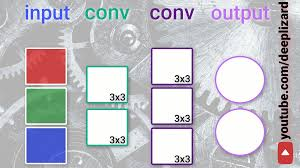

Consider a simple neural network: 

    Input(20x20x3) --> conv1(2 filters of size 3) --> conv2(3 filters of size 3) --> Output(Dense layer with 2 neuron)

**Input**: 0 learnable parameters for input layer.

    depth of input decides the depth of the filters used for the next layer.

**conv1:** Each filter will have 3x3 parameters. Total parameters in this layer is given by:

    Weights = input filters/channels x output 
    weights = 3x2x3x3 = 54
    Biases = #filters = 2
    Total learnable parameters in this layer = 54+2=56

**conv2:**In this layer we have 3 filters of 3x3 size. Total learnable parameters in this layer are:

    Weights = input filters x output
    Weights = 2x3x3x3 = 54
    biases = #filter = 3
    Total parameters = 54+3 = 57
  
**Output**: While passing from convolutional layer to dense layer, first we need to flatten the current input. Assuming we are using proper padding, size of the image will be as it is.

    Input size = 20x20x3
    output layer has two neurons, therefore total parameters = flatten input x #output neurons
    Weights = 20x20x3x2 = 2400
    biases = #neurons = 2
    total parameters = 2400+2=2402

(512, 512, 3)
float32
(1, 512, 512, 3)
Original Image


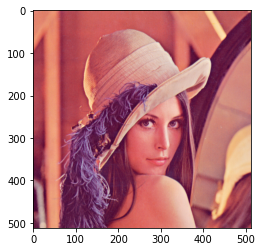

In [2]:
img = plt.imread('/content/lena.png')
print(img.shape)
print(img.dtype)
# Conv1d layer expects 3-d input
# create a batch as Conv2d layer expects 4-d input
img2 = np.expand_dims(img, axis=0)
print(img2.shape)
batch_size, height, width, channels = img2.shape
print('Original Image')
plt.imshow(img2[0,:,:,:])
plt.show()

### **1-D convolutional layer**

Output shape: As 1-D filter has only width and not height only width dimesion of the will be changed and height dimension will be as it is. height = (h-f+2*p)/strides + 1

Type : <class 'tensorflow.python.framework.ops.EagerTensor'>
Input shape: (512, 512, 3)
Output shape: (512, 506, 32)


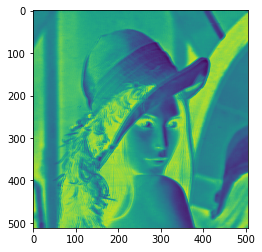

In [3]:
conv_1d = tf.keras.layers.Conv1D(32, kernel_size=7, strides=1, padding='valid', 
                        activation='sigmoid',
                        kernel_initializer='glorot_uniform'
                        )(img)
print('Type :', type(conv_1d))
# Output shape: As 1-D filter has only width and not height only 
# width dimesion of the will be changed and height dimension will 
# be as it is. height = (h-f+2*p)/strides + 1
print('Input shape:', img.shape)
print('Output shape:', conv_1d.shape)
plt.imshow(conv_1d[:,:,0])
plt.show()

### **How should you choose your filter_size?**

First, examine your input image — is it larger than 128×128?

If so, consider using a 5×5 or 7×7 kernel to learn larger features and then quickly reduce spatial dimensions — then start working with 3×3 kernels:

If your images are smaller than 128×128 you may want to consider sticking with strictly 1×1 and 3×3 filters.

###**Choosing number of filters**
As far as choosing the appropriate number of filters
, it is always recommend using powers of 2 as the values.

You may need to tune the exact value depending on: 
1.   the complexity of your dataset
and 
2.   the depth of your neural network,

but it is recommended starting with filters in the range [32, 64, 128] in the earlier and increasing up to [256, 512, 1024] in the deeper layers.

In [4]:
# # Create a 2-D filters
''' As far as choosing the appropriate value for no. of filters,
it is always recommended to use powers of 2 as the values.''' 
# filters = np.zeros(shape=(7, 7, channels), dtype=np.float32)
# print(filters.shape)

' As far as choosing the appropriate value for no. of filters,\nit is always recommended to use powers of 2 as the values.'

### **2-D convolutional layer**

Type : <class 'tensorflow.python.framework.ops.EagerTensor'>
Output shape: (1, 506, 506, 256)


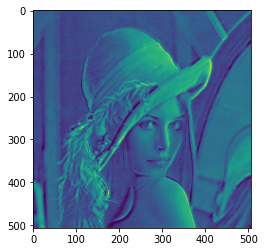

In [5]:
# 2-D convolutional layer
''' Mandatory Conv2D parameter is the numbers of filters that 
 convolutional layers will learn from. '''
conv_2d = tf.keras.layers.Conv2D(256, kernel_size=7, strides=1, 
                           padding='valid', activation='relu',
                           kernel_initializer="he_uniform"
                           )(img2)
print('Type :', type(conv_2d))
# Output shape: h/w = (input-kernel_size+2*padding)/stride +1
# (512-7+2*0)/1+1= 506
print('Output shape:', conv_2d.shape)
plt.imshow(conv_2d[0,:,:,0])
plt.show()

### **3-D convolutional layer**

Expects 5-D input dimensions
One example, The inputs are 28x28x28 volumes with a single channel, and the batch size is 4.

Other, we can take an output from Conv2D make it 5-D and pass it to the the Conv3D


In [6]:
img3 = np.expand_dims(conv_2d, axis=-1)
img3.shape

(1, 506, 506, 256, 1)

(1, 504, 504, 254, 2)
Output shape: (1, 504, 504, 254, 2)


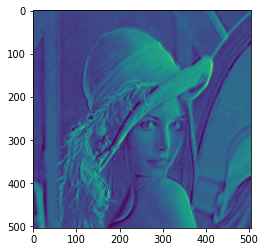

In [7]:
# 3-D convolutional layer. Expects 5-D input dimensions
# The inputs are 28x28x28 volumes with a single channel, and the  
# batch size is 4  
# input_shape =(4, 28, 28, 28, 1)
# x = tf.random.normal(input_shape)
conv_3d = tf.keras.layers.Conv3D(2, 3, activation='relu', 
                          #  input_shape=input_shape[1:]
                           )(img3)
print(conv_3d.shape)
# (4, 26, 26, 26, 2)
print('Output shape:', conv_3d.shape)
plt.imshow(conv_3d[0,:,:,0,0])
plt.show()

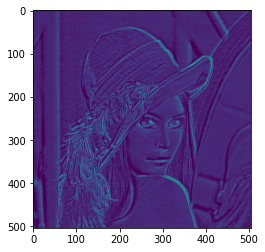

In [8]:
plt.imshow(conv_3d[0,:,:,101,0])
plt.show()

###**Depth wise separable Convoltion**
    SeparableConv1D layer
Standard convolution operations are slow to perform, however we can speed up this using alternative method called depthwise separable convolution.

This *SeparableConv* layer performs a depthwise convolution that acts separately on channels, followed by a pointwise convolution that mixes channels.

Multiplication is expensive in computation compared to addition. So, let's calculate the number of mutliplications we do in standard convolution.

    Input = (H x W x d)
    kernel_size = f x f x d
    #filters = d0
    And filters convolve horizontally and vertically to give Output = (H0 x W0 x d0)
    For each convolution total multiplications = f x f x d.
    Total multiplications per filter as it convolves around height and width of the input = (f x f x d) x (H x W)
    Total multiplications for d0 filters = d0 x (f x f x d) x (H x W)

**Depth wise separable Convoltion:**


1.   Depthwise convolution: Filtering stage


    Depthwise convolution applies convolution to a single input channel at a time.
    Input = (H x W x d)
    kernel_size = f x f x 1
    #filters = d (for each channel of the output)
    stacking outputs of all these filters, Shape of Output = (H0 x W0 x d)

2.   Pointwise Convolution: Combination Stage


    Involves performing linear combination of each of the layers we get from depthwise convolution.
    Input = (H0 x W0 x d)
    kernel_size = 1 x 1 x d
    #filters = d0
    Output = (H0 x W0 x d0)

**Complexity of depthwise separable convolution**

This complexity would be equal to sum of the total multiplications in depthwise convolution and total multiplications in pointwise convolution.

1. Depthwise convolution:


    For each convolution total multiplications = f x f x 1.
    Total multiplications per filter as it convolves around height and width of the input = (f x f x 1) x (H x W)
    Total multiplications for d filters = d x (f x f x 1) x (H x W)

2. Pointwise convolution:


    For each convolution total multiplications = 1 x 1 x d.
    Total multiplications per filter as it convolves around height and width of the input = (1 x 1 x d) x (H x W)
    Total multiplications for d0 filters = d0 x (1 x 1 x d) x (H x W)

Thus, 
    
    Total convolutions = dxfxfxHxW + d0xdxHxW
                       = HxWxd(fxf+d0)

**Comparison Standard vs Depthwise separable convolution**

Ratio of total multiplications in standard and depthwise separable convolutions is same as the number of total learnable parameters in standared convolutions to the total learnable parameters in Depthwise separable convolutions.
And there is a sigificant reduction in the learnable parameters in depthwise separable convolutions and hence reduces computation time.

<class 'tensorflow.python.framework.ops.EagerTensor'>
Input shape (512, 512, 3)
Output shape (512, 506, 32)


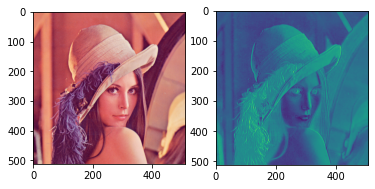

In [8]:
# SeparableConv1D layer expects 3-d input
# SeparableConv2D layer expects 4-d input
dwsc_1d = tf.keras.layers.SeparableConv1D(32, kernel_size=7, strides=1, padding='valid')(img)
print(type(dwsc_1d))
print('Input shape', img.shape)
print('Output shape', dwsc_1d.shape)
fig = plt.figure()
fig.add_subplot(1,2,1),plt.imshow(img)
fig.add_subplot(1,2,2),plt.imshow(dwsc_1d[:,:,5])
plt.show()

**DepthwiseConv2D layer**

Depthwise Separable convolutions consist of performing just the first step in a depthwise spatial convolution (which acts on each input channel separately). The depth_multiplier argument controls how many output channels are generated per input channel in the depthwise step.



Input shape: (1, 512, 512, 3)
Output shape: (1, 506, 506, 6)


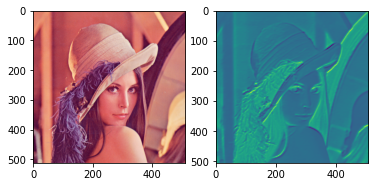

In [13]:
# DepthwiseConv2D layer expects 4-d input
dwc_2d = tf.keras.layers.DepthwiseConv2D(kernel_size=7, strides=1,
                                         padding='valid',
                                         depth_multiplier=2
                                         )(img2)
print('Input shape:', img2.shape)
print('Output shape:', dwc_2d.shape)
fig = plt.figure()
fig.add_subplot(1,2,1),plt.imshow(img2[0,:,:,:])
fig.add_subplot(1,2,2),plt.imshow(dwc_2d[0,:,:,0])
plt.show()

###**Transposed Convolution Layer**

Transposed convolution layer (sometimes called Deconvolution).

The need for transposed convolutions generally arises from the desire to use a transformation going in the opposite direction of a normal convolution, i.e., from something that has the shape of the output of some convolution to something that has the shape of its input while maintaining a connectivity pattern that is compatible with said convolution.

    1.   Conv2DTranspose: expects 4-d input
    2.   Conv3DTranspose: expectd 5-d input





Input shape: (1, 512, 512, 3)
output shape: (1, 518, 518, 32)


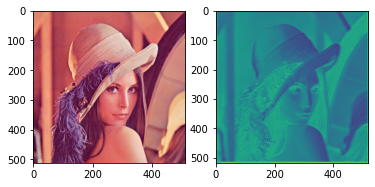

In [16]:
tc_2d = tf.keras.layers.Conv2DTranspose(32, kernel_size=7,
                                        strides=1,
                                        padding='valid'
                                        )(img2)
print('Input shape:', img2.shape)
print('output shape:', tc_2d.shape)
fig = plt.figure()
fig.add_subplot(1,2,1),plt.imshow(img2[0,:,:,:])
fig.add_subplot(1,2,2),plt.imshow(tc_2d[0,:,:,0])
plt.show()

### **Pooling Layers**

We know the filters in convolutional layers and dense layers do the job of feature map extracations, but at the same time we go on increasing the number of filters in the layers. This leads to the high computation and hence the pooling comes into picture to reduce the size of feature map to the half each time (obviously it depends on the strides we choose).

Pooling can be considered as the down sampling in which it takes the important information and discard the unimportant one.

**MaxPooling1D layer**

Expects 3-D input.

Downsamples the input representation by taking the maximum value over the window defined by pool_size. The window is shifted by strides. The resulting output when using "valid" padding option has a shape of: 

    output_shape = (input_shape - pool_size) / strides) + 1

The resulting output shape when using the "same" padding option is: 

    output_shape = input_shape / strides

<class 'tensorflow.python.framework.ops.EagerTensor'>
Input shape: (512, 506, 32)
Max_Pool_1d output shape: (512, 253, 32)


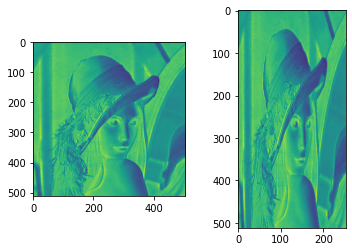

In [130]:
# MaxPooling1D layer
max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=(2),
                                           strides=2,
                                           padding='valid')(conv_1d)
print(type(max_pool_1d))
print('Input shape:', conv_1d.shape)
print('Max_Pool_1d output shape:', max_pool_1d.shape)
fig = plt.figure()
fig.add_subplot(1,2,1),plt.imshow(conv_1d[:,:,5])
fig.add_subplot(1,2,2),plt.imshow(max_pool_1d[:,:,5])
plt.show()

**MaxPooling2D layer**

Expects 4-D input


<class 'tensorflow.python.framework.ops.EagerTensor'>
Input shape: (1, 506, 506, 256)
Max_Pool 1-D shape: (1, 252, 252, 256)


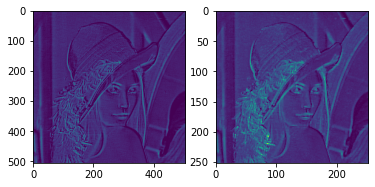

In [134]:
# MaxPooling2D layer
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(3,3),
                                           strides=2,
                                           padding='valid')(conv_2d)
print(type(max_pool_2d))
print('Input shape:', conv_2d.shape)
print('Max_Pool 1-D shape:', max_pool_2d.shape)
fig = plt.figure()
fig.add_subplot(1,2,1),plt.imshow(conv_2d[0,:,:,20])
fig.add_subplot(1,2,2),plt.imshow(max_pool_2d[0,:,:,20])
plt.show()

**MaxPooling3D layer**

Expects 5-D input.

<class 'tensorflow.python.framework.ops.EagerTensor'>
Input shape: (1, 504, 504, 254, 2)
Max_Pool 1-D shape: (1, 252, 252, 256)


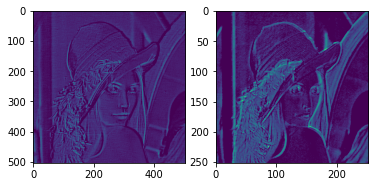

In [139]:
# MaxPooling3D layer
max_pool_3d = tf.keras.layers.MaxPooling3D(pool_size=(2,2,2),
                                           strides=2,
                                           padding='valid')(conv_3d)
print(type(max_pool_3d))
print('Input shape:', conv_3d.shape)
print('Max_Pool 1-D shape:', max_pool_2d.shape)
fig = plt.figure()
fig.add_subplot(1,2,1),plt.imshow(conv_3d[0,:,:,18,0])
fig.add_subplot(1,2,2),plt.imshow(max_pool_3d[0,:,:,18,0])
plt.show()

Similarly there are average pooling, global max pooling and global average pooling layers for the
same down sampling process.

**Average pooling**

Average pooling involves calculating the average for each patch of the feature map. This means that each pool_size×pool_size square of the feature map is down sampled to the average value in the square. 
Parameters are same as max pooling.

    1. AveragePooling1D layer
    2. AveragePooling2D layer
    3. AveragePooling3D layer
**Global max pooling**

Downsamples the input representation by taking the maximum value over the time dimension.

Global max pooling = ordinary max pooling layer with pool size equals to the size of the input (minus filter size + 1, to be precise). 

You can see that MaxPooling1D takes a pool_length argument, whereas GlobalMaxPooling1D does not.

In some domains, such as natural language processing, it is common to use global max pooling. In some other domains, such as computer vision, it is common to use a max pooling.

    4. GlobalMaxPooling1D layer
    5. GlobalMaxPooling2D layer
    6. GlobalMaxPooling3D layer

**Global Average pooing**

In the last few years, experts have turned to global average pooling (GAP) layers to minimize overfitting by reducing the total number of parameters in the model. Similar to max pooling layers, GAP layers are used to reduce the spatial dimensions of a three-dimensional tensor. However, GAP layers perform a more extreme type of dimensionality reduction, where a tensor with dimensions h×w×d is reduced in size to have dimensions 1×1×d. GAP layers reduce each h×w feature map to a single number by simply taking the average of all hw values.

    7. GlobalAveragePooling1D layer
    8. GlobalAveragePooling2D layer
    9. GlobalAveragePooling3D layer
